In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

hp = pd.read_csv('hp.csv')

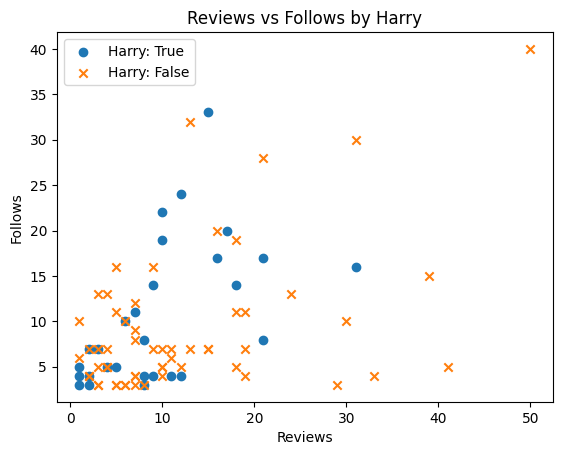

Intercept    4.515981
reviews      0.380842
harry        2.347333
dtype: float64


AttributeError: module 'pandas' has no attribute 'Dataframe'

In [ ]:
# Plot of follows vs reviews colored by harry
hp_harry_true = hp[hp['harry'] == True]
hp_harry_false = hp[hp['harry'] == False]

# Plot
plt.scatter(hp_harry_true['reviews'], hp_harry_true['follows'], label='Harry: True', marker='o')
plt.scatter(hp_harry_false['reviews'], hp_harry_false['follows'], label='Harry: False', marker='x')

# Labels and title
plt.xlabel('Reviews')
plt.ylabel('Follows')
plt.title('Reviews vs Follows by Harry')
plt.legend()

plt.show()

# Model predicting follows from reviews and harry
model0 = sm.OLS.from_formula('follows ~ reviews + harry', data=hp).fit()
print(model0.params)

y_0 = model0.predict(pd.DataFrame(hp['reviews']))

# Model predicting follows from reviews and harry with interaction
model1 = sm.OLS.from_formula('follows ~ reviews + harry + reviews:harry', data=hp).fit()
print(model1.params)

y_1 = model1.predict(pd.Dataframe(hp['reviews']))

In [ ]:
# Plot of favorites vs follows
sns.lmplot(x='follows', y='favorites', fit_reg=False, data=hp)
plt.show()

# Polynomial model with cubic term
modelP = sm.OLS.from_formula('favorites ~ follows + np.power(follows,3)', data=hp).fit()
print(modelP.params)

# Add curved line to plot
## Create set of follows values and predicted favorites
x=np.linspace(3,40,100)
y=modelP.params[0]+modelP.params[1]*x+modelP.params[2]*(x**3)

## Scatter plot
sns.lmplot(x='follows', y='favorites', fit_reg=False, data=hp)
## Add line
plt.plot(x,y,linewidth=4,linestyle='dashed',color='black')
plt.show()